In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Breast_cancer_data.csv")

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [25]:
"""
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
"""

"\nlabel_encoder = LabelEncoder()\nfor column in df.select_dtypes(include=['object']).columns:\n    df[column] = label_encoder.fit_transform(df[column])\n"

In [6]:
y = df["diagnosis"]
columns_to_scale = df.select_dtypes(exclude=['object']).columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [7]:
X = df.iloc[:,:-1]


In [11]:
model= DecisionTreeClassifier()

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred = model.predict(X_test)

In [21]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Score",accuracy_score(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print("Recall Score",recall_score(y_test,y_pred))
print("F1 Score",f1_score(y_test,y_pred))

Confusion Matrix:
 [[39  4]
 [ 7 64]]

Accuracy Score 0.9035087719298246
Precision Score 0.9411764705882353
Recall Score 0.9014084507042254
F1 Score 0.920863309352518


In [23]:
train_score, test_score = list(),list()
for i in range (1,21):
      model = DecisionTreeClassifier(max_depth= i)
      model.fit(X_train,y_train)
      y_pred_train = model.predict(X_train)
      train_acc = f1_score(y_train,y_pred_train)
      train_score.append(train_acc)
      y_pred_test = model.predict(X_test)
      test_acc = f1_score(y_test,y_pred_test)
      test_score.append(test_acc)
      print('%d train: %.3f,test: %.3f'% (i,train_acc,test_acc))

1 train: 0.913,test: 0.940
2 train: 0.913,test: 0.940
3 train: 0.933,test: 0.921
4 train: 0.962,test: 0.929
5 train: 0.976,test: 0.943
6 train: 0.986,test: 0.936
7 train: 0.991,test: 0.929
8 train: 0.997,test: 0.935
9 train: 1.000,test: 0.935
10 train: 1.000,test: 0.913
11 train: 1.000,test: 0.935
12 train: 1.000,test: 0.921
13 train: 1.000,test: 0.928
14 train: 1.000,test: 0.935
15 train: 1.000,test: 0.921
16 train: 1.000,test: 0.920
17 train: 1.000,test: 0.920
18 train: 1.000,test: 0.928
19 train: 1.000,test: 0.920
20 train: 1.000,test: 0.928


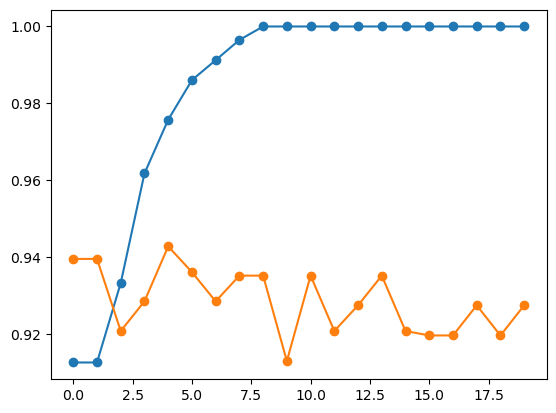

In [24]:
import matplotlib.pyplot as plt
plt.plot(train_score, "-o")
plt.plot(test_score, "-o")
plt.show()